In [1]:
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt

# Prepare Dataset

In [2]:
df = pd.read_csv('statistics.csv')

In [3]:
df["created_on"] = pd.to_datetime(df["created_on"])
df["updated_on"] = pd.to_datetime(df["updated_on"])

In [4]:
df["hour"] = df["created_on"].dt.hour
df["hourminute"] = (df["created_on"].dt.hour*100 + (df["created_on"].dt.minute)/60*100).astype(int)
df["day"] = df["created_on"].dt.day_name(locale ='German')
ref_date = pd.to_datetime(date(2024, 2, 27))
df["dayscount"] = (df["created_on"] - ref_date).dt.components.days
df  = df[df["dayscount"] >=0] 
df['referat'] = df['department'].str.split('-', expand=True)[0]
df

,id,tokencount,department,messagecount,method,created_on,updated_on,hour,hourminute,day,dayscount,referat
105,1229,816,S-SBH-LS-T1-SGBXII,3,Chat,2024-02-28 07:58:43.980322,2024-02-28 07:58:43.980329,7,796,Mittwoch,1,S
106,1230,233,GSR-GL31,4,Chat,2024-02-28 07:58:44.619014,2024-02-28 07:58:44.619020,7,796,Mittwoch,1,GSR
107,1231,3524,ITM-KM13,11,Chat,2024-02-28 07:58:44.925098,2024-02-28 07:58:44.925105,7,796,Mittwoch,1,ITM
108,1242,248,KVR-I/L-Sts,1,Chat,2024-02-28 08:00:17.149701,2024-02-28 08:00:17.149709,8,800,Mittwoch,1,KVR
109,1243,299,POR-5/12,2,Chat,2024-02-28 08:00:18.753636,2024-02-28 08:00:18.753643,8,800,Mittwoch,1,POR
...,...,...,...,...,...,...,...,...,...,...,...,...
59237,59235,641,GSR-GL,2,Chat,2024-05-07 10:17:22.420684,2024-05-07 10:17:22.420689,10,1028,Dienstag,70,GSR
59238,59236,207,KULT-ABT5-Z,1,Chat,2024-05-07 10:18:08.992630,2024-05-07 10:18:08.992636,10,1030,Dienstag,70,KULT
59239,59237,742,ITM-IBS521,4,Chat,2024-05-07 10:18:26.772737,2024-05-07 10:18:26.772742,10,1030,Dienstag,70,ITM
59240,59239,482,KULT-ABT5-Z,2,Chat,2024-05-07 10:18:49.491093,2024-05-07 10:18:49.491098,10,1030,Dienstag,70,KULT


In [5]:
noweekenddf = df.query('day!="Sonntag" and day!="Samstag"')

# Plot Stuff

In [6]:
qualitative_colors = sns.color_palette("Set2", 3)
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.set_palette(qualitative_colors)

## Anfragen pro Methode

**Erklärung**: Es gibt in der Oberfläche die Anwendungsmöglichkeiten *Chat*, *Zusammenfassen* und *Brainstorm*. Wieviele einzelne Anfragen (z.B. eine Zusammenfassungsanfrage, eine neue Nachricht im Chat, eine neue generierte Mindmap) wurden insgesamt gesendet?

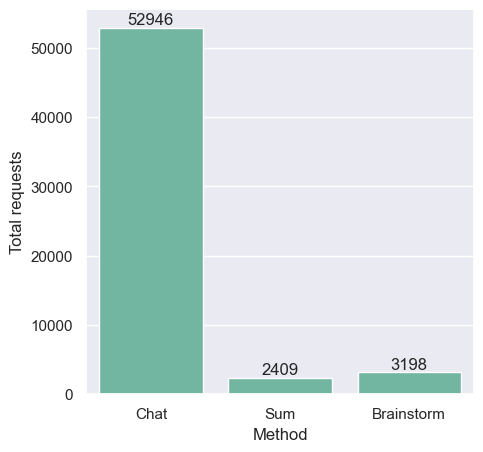

In [7]:
a4_dims = (5, 5)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(noweekenddf, x="method", ax=ax)
chart.set(xlabel='Method', ylabel='Total requests')
ax.bar_label(ax.containers[0])
plt.savefig("anfragenMethode.png")
plt.show()

In [8]:
 noweekenddf[["method", "messagecount"]].groupby(["method"]).sum()# Nochmal die Anfragen als Zahlen

,messagecount
method,
Brainstorm,3198
Chat,189316
Sum,2409


In [9]:
 noweekenddf[["method", "tokencount"]].groupby(["method"]).sum()  #Das enstpricht sovielen verbrauchten Token über die Anwendungsfälle

,tokencount
method,
Brainstorm,3251238
Chat,43689196
Sum,1289466


## Wielange werden unsere Chats? Wieviele Nachrichten werden gesendet?

**Erkärung**: Im *Chat* kann man über mehrere Nachrichten kommunizieren. Bei einer erneuten Anfrage mit einem vorhandenen Chatverlauf, werden alle Nachrichten im Kontext (im Chat) an MUCGPT gesendet. Auf der X-Achse ist aufsummiert, wieviele Nachrichten im Kontext jeweils vorhanden sind. Z.b. enthalten die meisten Nachrichten genau 1 "Benutzeranfrage" und keine sonstige Kommunikation. Die meisten Chats beinhalten weniger als 16 Nachrichten. 

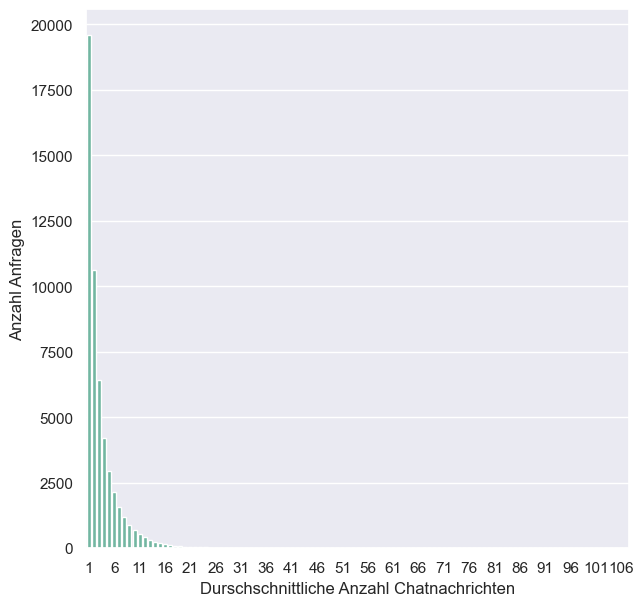

In [10]:
a4_dims = (7, 7)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(noweekenddf[noweekenddf["method"]=="Chat"], x="messagecount", ax=ax)
chart.set(xlabel='Durschschnittliche Anzahl Chatnachrichten', ylabel='Anzahl Anfragen')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
#ax.bar_label(ax.containers[0])
plt.show()

## Zeitlich
### Anfragen pro Wochentag
**Erklärung**: Wieviele Anfragen gab es an welchem Wochentag?

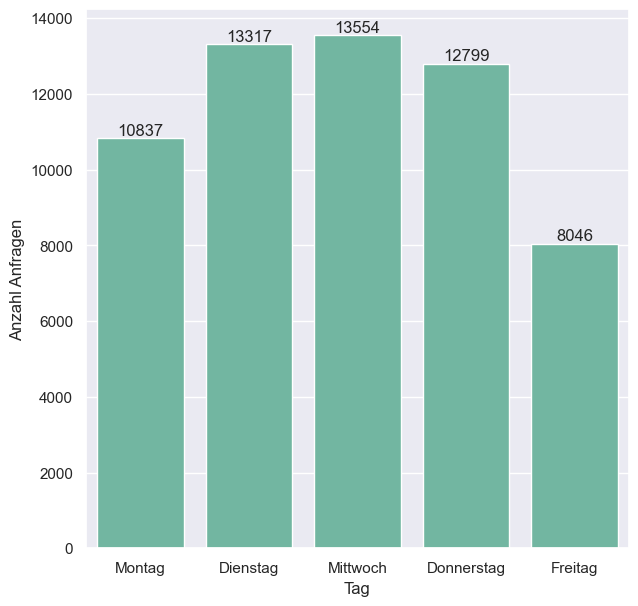

In [11]:
a4_dims = (7, 7)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(noweekenddf, x="day", order=["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag"], ax=ax)
chart.set(xlabel='Tag', ylabel='Anzahl Anfragen')
ax.bar_label(ax.containers[0])
plt.show()

### Anfragen pro Tag x seit Launch (Ausgenommen Wochenenden)
**Erklärung**: Wieviele Anfragen sind an einem bestimmten Tag aufgetreten?

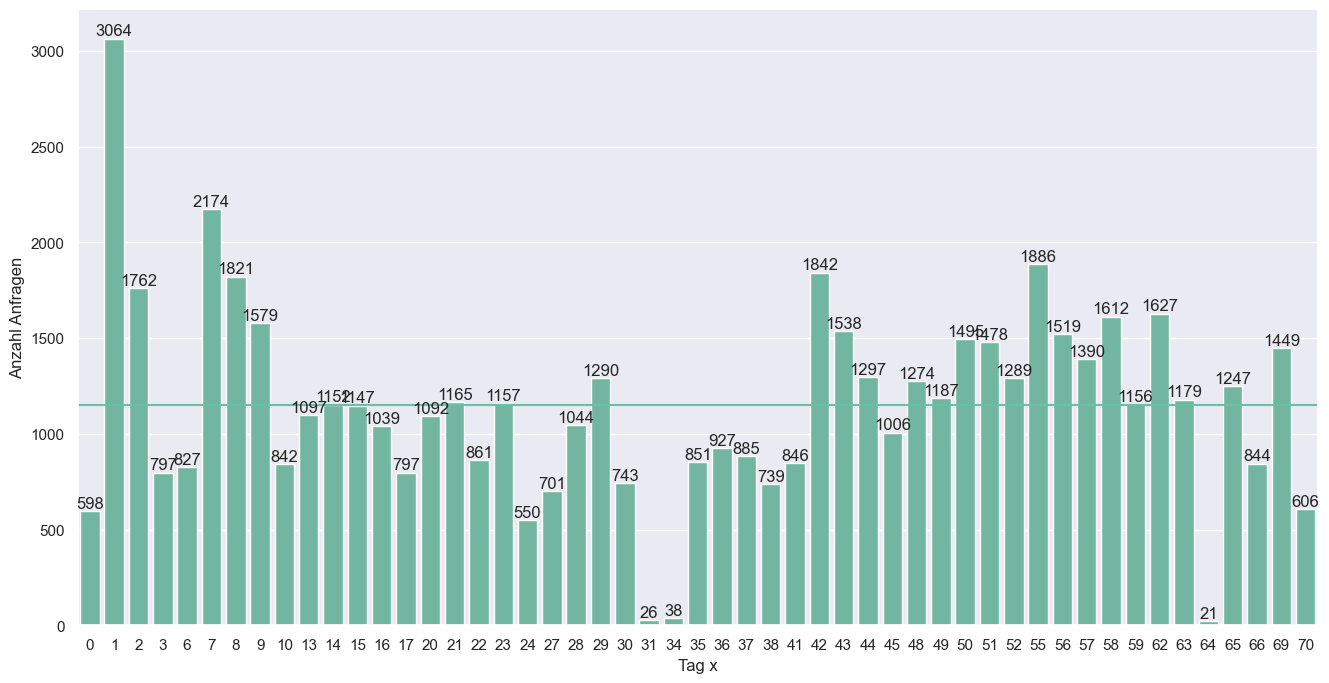

Durschschnitt pro Tag ist: 1148.0980392156862 Anfragen


In [12]:
a4_dims = (16, 8)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(noweekenddf, x="dayscount", ax=ax)
chart.set(xlabel='Tag x', ylabel='Anzahl Anfragen')
meanday = noweekenddf.groupby(['dayscount'])[["dayscount"]].count()['dayscount'].mean()
ax.bar_label(ax.containers[0])
plt.axhline(y=meanday)
plt.show()
print("Durschschnitt pro Tag ist: " + str(meanday) + " Anfragen" )

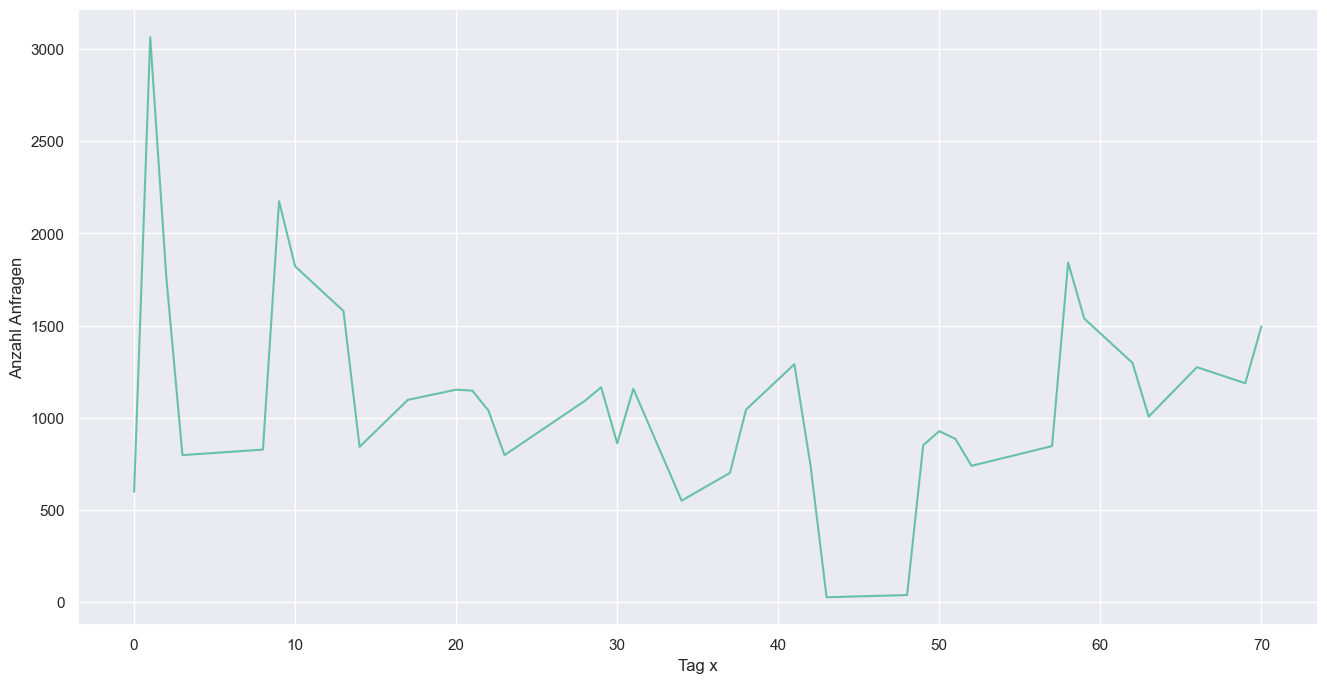

In [13]:
groupedby_dayscount_df = pd.DataFrame()
groupedby_dayscount= noweekenddf.groupby(['dayscount'])[["dayscount"]].count()
groupedby_dayscount_df["days"] = groupedby_dayscount.index
groupedby_dayscount_df["count"] = groupedby_dayscount["dayscount"]
groupedby_dayscount_df = groupedby_dayscount_df[groupedby_dayscount_df['count'].notna()]
a4_dims = (16, 8)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.lineplot(data=groupedby_dayscount_df, x="days", y="count")
chart.set(xlabel='Tag x', ylabel='Anzahl Anfragen')
plt.show()

### Anfragen pro Stunde
**Erklärung**: Wieviele Anfragen gab es in einer bestimmten Stunde?

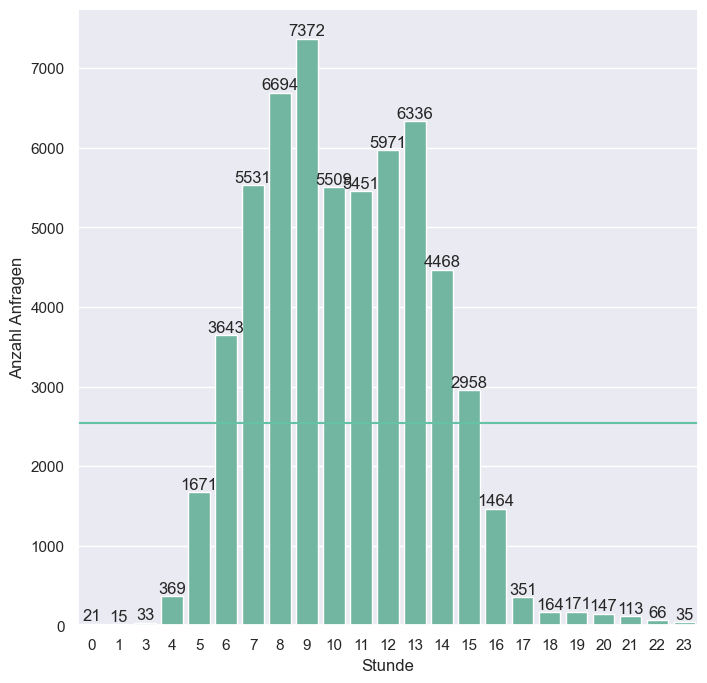

In [14]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.countplot(noweekenddf, x="hour", ax=ax)
chart.set(xlabel='Stunde', ylabel='Anzahl Anfragen')
meanhour = noweekenddf.groupby(['hour'])[["hour"]].count()['hour'].mean()
plt.axhline(y=meanhour)
ax.bar_label(ax.containers[0])
plt.show()

### Verteilung der Anfragen pro Tag pro Stunde
**Erklärung**: Wieviele Anfragen gab es durchschnittlich pro Tag pro Stund?  Auf der *X-Achse* ist dabei die Stunde zwischen 0 und 2400 angegeben. Die Stunde 8:30 würde in diesem Format 8500 entsprechen.

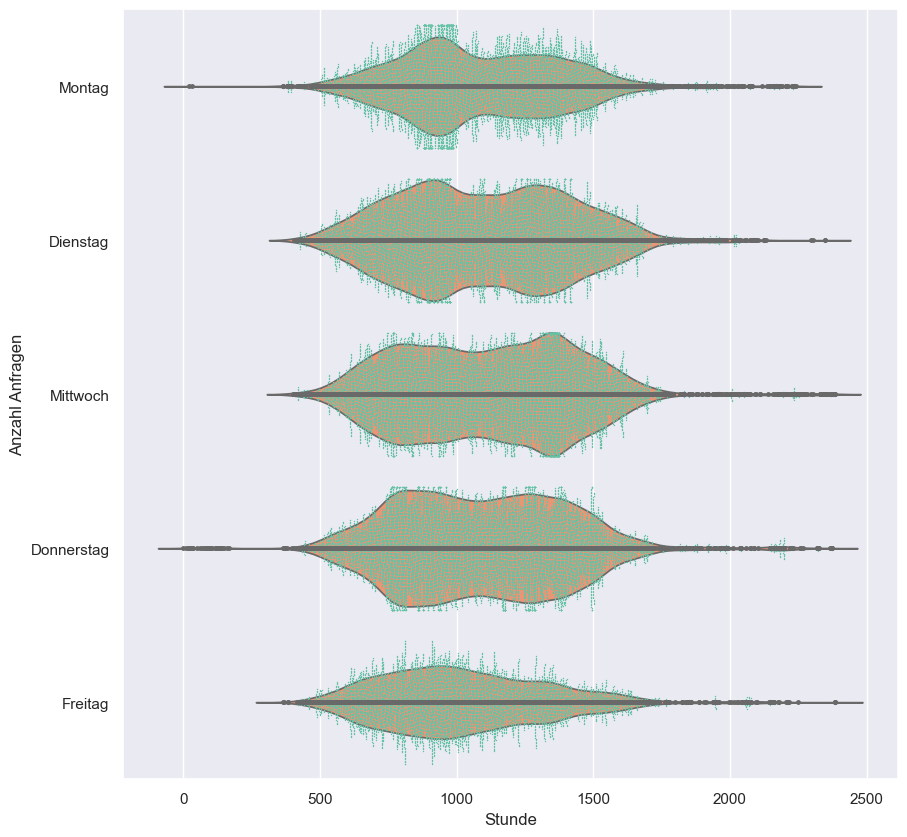

In [15]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)

swarm = sns.swarmplot(data=noweekenddf, x="hourminute", y="day", size=1, ax=ax, order=["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag"])
chart = sns.violinplot(data=noweekenddf, x="hourminute", y="day", ax=ax, inner="point",  density_norm="count")

swarm.set(xlabel='Stunde', ylabel='Anzahl Anfragen')
plt.show()

## Abteilung
### Token pro Abteilung für die Top 15 Abteilungen
**Erklärung**: Wieviele Token haben die 15 größten Verbraucher (Abteilungen) benutzt. Auf der X-Achse ist der Wert in Tausenden angegeben.

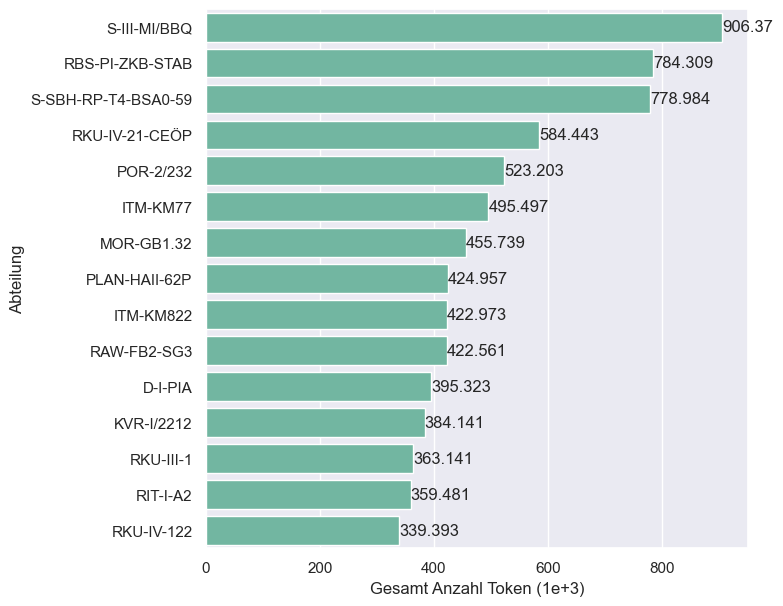

In [16]:
a4_dims = (7, 7)
fig, ax = plt.subplots(figsize=a4_dims)
token_per_department_df = df.groupby(['department'])[["tokencount"]].sum().sort_values(by="tokencount", ascending=False)[0:15]/1000
chart = sns.barplot(token_per_department_df, x="tokencount", y="department", ax=ax)
chart.set(xlabel='Gesamt Anzahl Token (1e+3)', ylabel='Abteilung')

ax.bar_label(ax.containers[0])
plt.show()

### Anfragen pro Abteilung für die Top 15
**Erklärung**: Wieviele Anfragen haben die 15 größten Verbraucher (Abteilungen) benutzt.

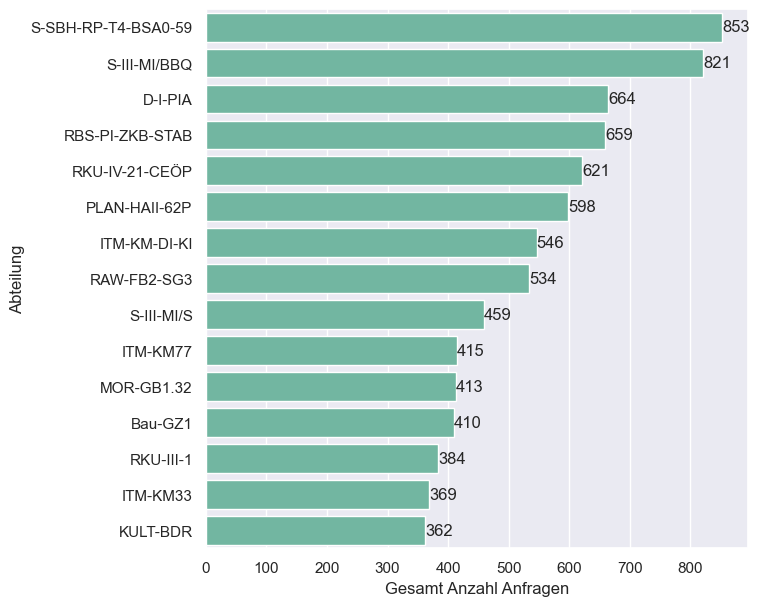

In [17]:
a4_dims = (7, 7)
fig, ax = plt.subplots(figsize=a4_dims)
anfragen_per_department_df = df.groupby(['department'])[["tokencount"]].count().sort_values(by="tokencount", ascending=False)[0:15]
chart = sns.barplot(anfragen_per_department_df, x="tokencount", y="department",ax=ax)
chart.set(xlabel='Gesamt Anzahl Anfragen', ylabel='Abteilung')
ax.bar_label(ax.containers[0])
plt.show()

## Referat
### Token pro Referat
**Erklärung**: Wieviele Token haben die Referate verbraucht.

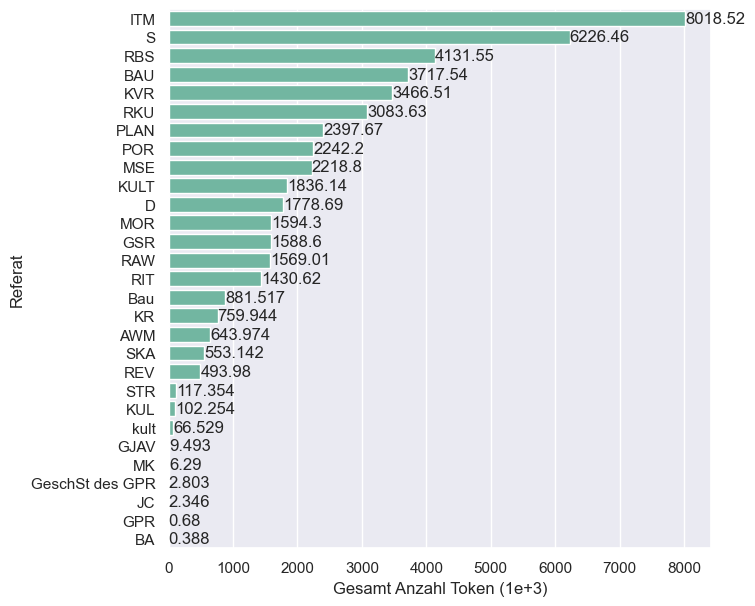

In [18]:
a4_dims = (7, 7)
fig, ax = plt.subplots(figsize=a4_dims)
token_per_referat_df = df.groupby(['referat'])[["tokencount"]].sum().sort_values(by="tokencount", ascending=False)/1000
chart = sns.barplot(token_per_referat_df, x="tokencount", y="referat", ax=ax)
chart.set(xlabel='Gesamt Anzahl Token (1e+3)', ylabel='Referat')

ax.bar_label(ax.containers[0])
plt.show()

In [19]:
#token_per_referat_df # Nochmal als Tabelle

## Anfragen pro Referat 
Erklärung: Wieviele Anfragen haben die Referate gesendet?

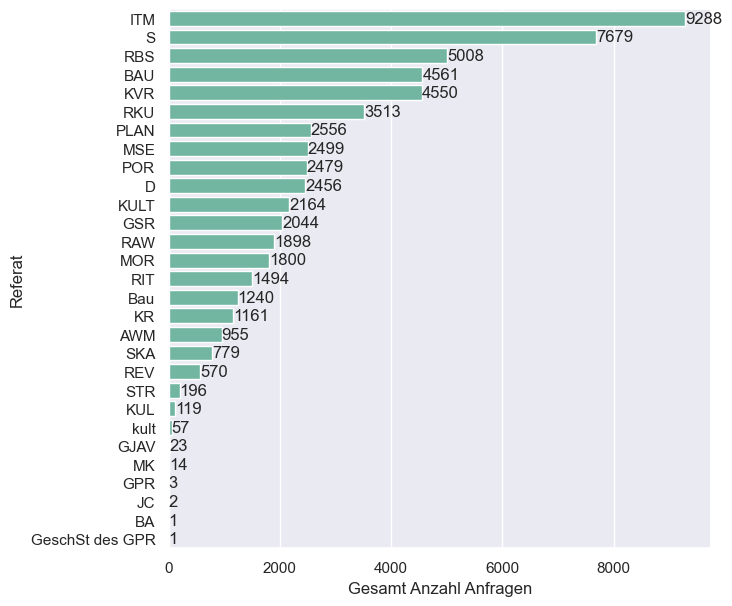

In [20]:
a4_dims = (7, 7)
fig, ax = plt.subplots(figsize=a4_dims)
anfragen_per_referat_df = df.groupby(['referat'])[["tokencount"]].count().sort_values(by="tokencount", ascending=False)
chart = sns.barplot(anfragen_per_referat_df[:], x="tokencount", y="referat",ax=ax)
chart.set(xlabel='Gesamt Anzahl Anfragen', ylabel='Referat')
ax.bar_label(ax.containers[0])
plt.savefig("anrfagenReferat.png")
plt.show()

# Anfragen an Tag x (neuester Tag) pro Stunde

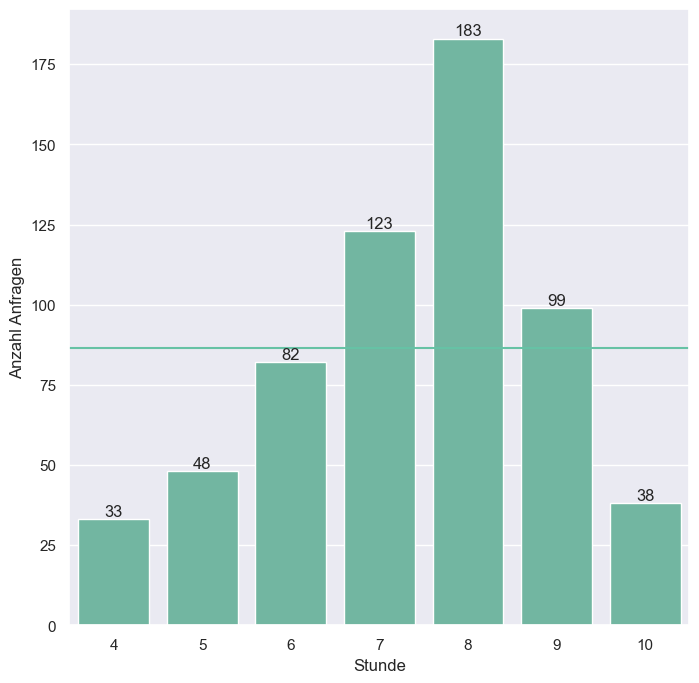

In [21]:
# Am Tag x
x = df['dayscount'].max()
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
testdf = df[df['dayscount']==x]
chart = sns.countplot(testdf, x="hour", ax=ax)
chart.set(xlabel='Stunde', ylabel='Anzahl Anfragen')
meanhour = testdf.groupby(['hour'])[["hour"]].count()['hour'].mean()
plt.axhline(y=meanhour)
ax.bar_label(ax.containers[0])
plt.show()

# Anfragen an Tag x (neuester Tag) pro Minute
**Erklärung**: Wieviele Anfragen gab es heute pro Minute?  Auf der *X-Achse* ist dabei die Stunde zwischen 0 und 2400 angegeben. Die Stunde 8:30 würde in diesem Format 8500 entsprechen.

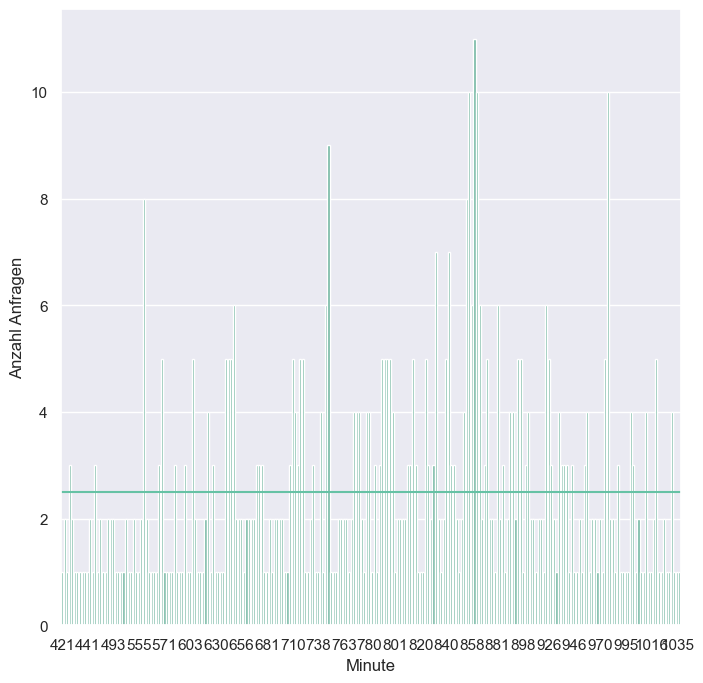

In [22]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
testdf = df[df['dayscount']==x]
chart = sns.countplot(testdf, x="hourminute", ax=ax)
chart.set(xlabel='Minute', ylabel='Anzahl Anfragen')
meanhour = testdf.groupby(['hourminute'])[["hourminute"]].count()['hourminute'].mean()
plt.axhline(y=meanhour)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
#plt.setp(ax.axes.get_xticklabels(), visible=True)
#plt.setp(ax.axes.get_xticklabels()[::], visible=True)
#ax.bar_label(ax.containers[0])
plt.show()

# Tokenanzahl am Tag x (neuester Tag) pro Minute
**Erklärung**: Wieviele Token wurden heute pro Minute benötigt?  Auf der *X-Achse* ist dabei die Stunde zwischen 0 und 2400 angegeben. Die Stunde 8:30 würde in diesem Format 8500 entsprechen.

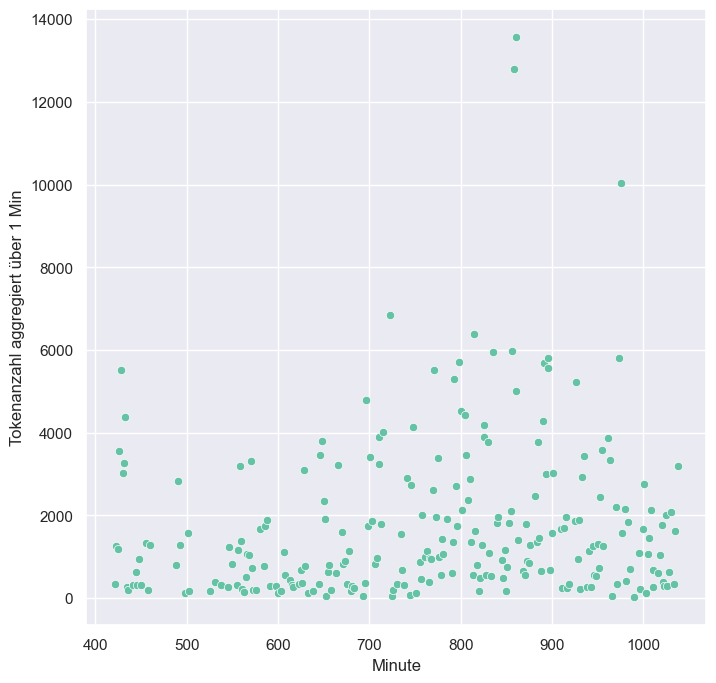

In [23]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
byhour = testdf.groupby(['hourminute'])[["tokencount"]].sum()
byhour['hourminute'] = byhour.index
chart = sns.scatterplot(byhour, x="hourminute", y="tokencount", ax=ax)
chart.set(xlabel='Minute', ylabel='Tokenanzahl aggregiert über 1 Min')
plt.show()


In [23]:
#testdf.groupby(['hourminute']).agg({'tokencount': 'sum'}).index